## Importing all the Libraries

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from datetime import datetime

## Reading all the collected Data

In [2]:
populationgrowth = pd.read_csv('USpopulationpermonth multpl.csv')
Rent = pd.read_csv('USA Rental Rates fred stlouisfed.csv')
HousingStarts = pd.read_csv('U.S. Housing Starts investing.csv')
MortgagevsFedFund = pd.read_csv('Mortgage rates versus the fed funds rate FRED stloiuisfed.csv')
InterestRates = pd.read_csv('Mortgage interest rates FreddieMac.csv')
InflationRates = pd.read_csv('Inflation Rates thebalance.csv')
HousePrices = pd.read_csv('Home Prices fred stlouisfed.csv')
USAGDP = pd.read_csv('gross_domestic_product_usafacts.csv')
ForeClosures = pd.read_csv('foreclosures corelogic.csv')
EquityinHomes = pd.read_csv('Equity versus debt in the housing market MarketWatch.csv')
DelinquencyRates = pd.read_csv('Delinquency Rate on All Loans Fred Stlouisfed.csv')
DebtinHousing = pd.read_csv('debt federal reserve gov.csv')

## Re-Sampling everything to montly Data

#### The Data has been collected from Multlp

In [3]:
populationgrowth.head()

,DATE,Value
0,01/01/87,332.73 million
1,01/02/87,332.64 million
2,01/03/87,332.60 million
3,01/04/87,332.54 million
4,01/05/87,332.47 million


In [4]:
populationgrowth.tail()

,DATE,Value
419,01/12/21,242.29 million
420,01/01/22,NaN
421,01/02/22,NaN
422,01/03/22,NaN
423,01/04/22,NaN


In [5]:
populationgrowth

,DATE,Value
0,01/01/87,332.73 million
1,01/02/87,332.64 million
2,01/03/87,332.60 million
3,01/04/87,332.54 million
4,01/05/87,332.47 million
...,...,...
419,01/12/21,242.29 million
420,01/01/22,NaN
421,01/02/22,NaN
422,01/03/22,NaN


In [6]:
populationgrowth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    424 non-null    object
 1   Value   390 non-null    object
dtypes: object(2)
memory usage: 6.8+ KB


In [7]:
populationgrowth = populationgrowth.astype({'Value':'string'})

In [8]:
populationgrowth = populationgrowth.applymap(lambda x: x.strip(' million') if isinstance(x, str) else x)

In [9]:
#populationgrowth = populationgrowth.dropna()
populationgrowth['Value'] = pd.to_numeric(populationgrowth['Value'], errors='coerce')


In [10]:
populationgrowth['Value'] = populationgrowth['Value'].apply(lambda x: x*1000000)

In [11]:
populationgrowth['DATE'] = pd.to_datetime(populationgrowth['DATE'])

In [12]:
populationgrowth

,DATE,Value
0,1987-01-01,332730000.0
1,1987-01-02,332640000.0
2,1987-01-03,332600000.0
3,1987-01-04,332540000.0
4,1987-01-05,332470000.0
...,...,...
419,2021-01-12,242290000.0
420,2022-01-01,NaN
421,2022-01-02,NaN
422,2022-01-03,NaN


In [13]:
populationgrowth = populationgrowth.fillna(method='ffill', axis=None, inplace=False, limit=None, downcast=None)

In [14]:
populationgrowth

,DATE,Value
0,1987-01-01,332730000.0
1,1987-01-02,332640000.0
2,1987-01-03,332600000.0
3,1987-01-04,332540000.0
4,1987-01-05,332470000.0
...,...,...
419,2021-01-12,242290000.0
420,2022-01-01,242290000.0
421,2022-01-02,242290000.0
422,2022-01-03,242290000.0


In [15]:
populationgrowth_reverse = populationgrowth.iloc[::-1]

In [16]:
populationgrowth_reverse

,DATE,Value
423,2022-01-04,242290000.0
422,2022-01-03,242290000.0
421,2022-01-02,242290000.0
420,2022-01-01,242290000.0
419,2021-01-12,242290000.0
...,...,...
4,1987-01-05,332470000.0
3,1987-01-04,332540000.0
2,1987-01-03,332600000.0
1,1987-01-02,332640000.0


In [17]:
populationgrowth_reverse.reset_index(inplace = True, drop = True)

In [18]:
populationgrowth_reverse

,DATE,Value
0,2022-01-04,242290000.0
1,2022-01-03,242290000.0
2,2022-01-02,242290000.0
3,2022-01-01,242290000.0
4,2021-01-12,242290000.0
...,...,...
419,1987-01-05,332470000.0
420,1987-01-04,332540000.0
421,1987-01-03,332600000.0
422,1987-01-02,332640000.0


In [19]:
populationgrowth_reverse = populationgrowth_reverse.drop(['DATE'], axis=1)

In [20]:
populationgrowth_reverse

,Value
0,242290000.0
1,242290000.0
2,242290000.0
3,242290000.0
4,242290000.0
...,...
419,332470000.0
420,332540000.0
421,332600000.0
422,332640000.0


In [21]:
populationgrowth = populationgrowth.drop(['Value'], axis=1)

In [22]:
populationgrowth = pd.concat([populationgrowth, populationgrowth_reverse], axis=1, join='inner')

In [23]:
populationgrowth

,DATE,Value
0,1987-01-01,242290000.0
1,1987-01-02,242290000.0
2,1987-01-03,242290000.0
3,1987-01-04,242290000.0
4,1987-01-05,242290000.0
...,...,...
419,2021-01-12,332470000.0
420,2022-01-01,332540000.0
421,2022-01-02,332600000.0
422,2022-01-03,332640000.0


#### The Data has been collected from fred stlouisfed

In [24]:
Rent[420:430]

,DATE,RENT
420,01/01/22,359.627
421,01/02/22,361.083
422,01/03/22,362.951
423,01/04/22,365.116
424,NaN,NaN
425,NaN,NaN
426,NaN,NaN
427,NaN,NaN
428,NaN,NaN
429,NaN,NaN


In [25]:
Rent = Rent.dropna()

In [26]:
Rent

,DATE,RENT
0,01/01/87,121.700
1,01/02/87,121.800
2,01/03/87,122.000
3,01/04/87,122.300
4,01/05/87,122.300
...,...,...
419,01/12/21,357.737
420,01/01/22,359.627
421,01/02/22,361.083
422,01/03/22,362.951


In [27]:
Rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    424 non-null    object 
 1   RENT    424 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.9+ KB


In [28]:
Rent['DATE'] = pd.to_datetime(Rent['DATE'])

In [29]:
Rent

,DATE,RENT
0,1987-01-01,121.700
1,1987-01-02,121.800
2,1987-01-03,122.000
3,1987-01-04,122.300
4,1987-01-05,122.300
...,...,...
419,2021-01-12,357.737
420,2022-01-01,359.627
421,2022-01-02,361.083
422,2022-01-03,362.951


#### The Data has been collected from Investing.com

In [30]:
HousingStarts

,DATE,US HOUSING STARTS
0,01/04/22,1.549M
1,01/03/22,1.724M
2,01/02/22,1.793M
3,01/01/22,1.769M
4,01/12/21,1.638M
...,...,...
419,01/05/87,1.61M
420,01/04/87,1.73M
421,01/03/87,1.78M
422,01/02/87,1.77M


In [31]:
HousingStarts = HousingStarts.astype({'US HOUSING STARTS':'string'})

In [32]:
HousingStarts = HousingStarts.applymap(lambda x: x.strip('M') if isinstance(x, str) else x)

In [33]:
HousingStarts['US HOUSING STARTS'] = pd.to_numeric(HousingStarts['US HOUSING STARTS'], errors='coerce')


In [34]:
HousingStarts['US HOUSING STARTS'] = HousingStarts['US HOUSING STARTS'].apply(lambda x: x*1000000)

In [35]:
HousingStarts['DATE'] = pd.to_datetime(HousingStarts['DATE'])

In [36]:
HousingStarts

,DATE,US HOUSING STARTS
0,2022-01-04,1549000.0
1,2022-01-03,1724000.0
2,2022-01-02,1793000.0
3,2022-01-01,1769000.0
4,2021-01-12,1638000.0
...,...,...
419,1987-01-05,1610000.0
420,1987-01-04,1730000.0
421,1987-01-03,1780000.0
422,1987-01-02,1770000.0


In [37]:
HousingStarts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               424 non-null    datetime64[ns]
 1   US HOUSING STARTS  424 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.8 KB


#### The Data has been collected from FRED stloiuisfed

In [38]:
MortgagevsFedFund

,DATE,FEDFUNDS,MORTGAGE RATES
0,01/12/86,6.91,9.31
1,01/01/87,6.43,9.20
2,01/02/87,6.10,9.08
3,01/03/87,6.13,9.04
4,01/04/87,6.37,9.83
...,...,...,...
422,01/02/22,0.08,3.76
423,01/03/22,0.20,4.17
424,01/04/22,0.33,4.98
425,01/05/22,0.77,5.23


In [39]:
MortgagevsFedFund['DATE'] = pd.to_datetime(MortgagevsFedFund['DATE'])

In [40]:
MortgagevsFedFund = MortgagevsFedFund[1:425]
MortgagevsFedFund = MortgagevsFedFund.sort_values(by='DATE', ascending=False)

In [41]:
MortgagevsFedFund

,DATE,FEDFUNDS,MORTGAGE RATES
424,2022-01-04,0.33,4.98
423,2022-01-03,0.20,4.17
422,2022-01-02,0.08,3.76
421,2022-01-01,0.08,3.45
420,2021-01-12,0.08,3.10
...,...,...,...
5,1987-01-05,6.85,10.60
4,1987-01-04,6.37,9.83
3,1987-01-03,6.13,9.04
2,1987-01-02,6.10,9.08


#### The Data has been collected from freddieMac

In [42]:
InterestRates

,DATE,Mortgage Interest Rates
0,25/05/84,14.08
1,01/06/84,14.29
2,08/06/84,14.33
3,15/06/84,14.47
4,22/06/84,14.49
...,...,...
1984,02/06/22,5.09
1985,09/06/22,5.23
1986,16/06/22,5.78
1987,23/06/22,5.81


In [43]:
InterestRates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATE                     1989 non-null   object 
 1   Mortgage Interest Rates  1989 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.2+ KB


In [44]:
InterestRates['DATE'] = pd.to_datetime(InterestRates['DATE'])

In [45]:
InterestRates.head(135)

,DATE,Mortgage Interest Rates
0,1984-05-25,14.08
1,1984-01-06,14.29
2,1984-08-06,14.33
3,1984-06-15,14.47
4,1984-06-22,14.49
...,...,...
130,1986-11-21,9.64
131,1986-11-28,9.50
132,1986-05-12,9.30
133,1986-12-12,9.35


In [46]:
InterestRates = InterestRates[135:-9]

In [47]:
InterestRates = InterestRates.resample('M', on='DATE').max()
##InterestRates

In [48]:
InterestRates = InterestRates[1:-6]
InterestRates.tail()

,DATE,Mortgage Interest Rates
DATE,,
2021-12-31,2021-12-30,3.12
2022-01-31,2022-01-27,3.56
2022-02-28,2022-02-24,3.92
2022-03-31,2022-03-31,4.67
2022-04-30,2022-04-28,5.11


In [49]:
InterestRates

,DATE,Mortgage Interest Rates
DATE,,
1987-01-31,1987-01-30,10.47
1987-02-28,1987-02-27,11.18
1987-03-31,1987-03-27,10.36
1987-04-30,1987-04-24,10.63
1987-05-31,1987-05-29,10.81
...,...,...
2021-12-31,2021-12-30,3.12
2022-01-31,2022-01-27,3.56
2022-02-28,2022-02-24,3.92


In [50]:
InterestRates['DATE'] = populationgrowth['DATE'].values

#### The Data has been collected from thebalance

In [51]:
InflationRates

,DATE,Inflation Rates
0,1986,1.1
1,1987,4.4
2,1988,4.4
3,1989,4.6
4,1990,6.1
5,1991,3.1
6,1992,2.9
7,1993,2.7
8,1994,2.7
9,1995,2.5


In [52]:
InflationRates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             37 non-null     int64  
 1   Inflation Rates  37 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 720.0 bytes


In [53]:
InflationRates['DATE'] = pd.to_datetime(InflationRates['DATE'], format="%Y")

In [54]:
InflationRates.head(20)

,DATE,Inflation Rates
0,1986-01-01,1.1
1,1987-01-01,4.4
2,1988-01-01,4.4
3,1989-01-01,4.6
4,1990-01-01,6.1
5,1991-01-01,3.1
6,1992-01-01,2.9
7,1993-01-01,2.7
8,1994-01-01,2.7
9,1995-01-01,2.5


In [55]:
dtypes = np.dtype(
    [
        ('DATE',np.datetime64),
        ("Inflation Rates", float)
    ]
)
UpsampledInflationRateDates = pd.DataFrame(np.empty(0, dtype=dtypes))

UpsampledInflationRateDates['DATE'] = populationgrowth['DATE'] 

In [56]:
UpsampledInflationRateDates

,DATE,Inflation Rates
0,1987-01-01,NaN
1,1987-01-02,NaN
2,1987-01-03,NaN
3,1987-01-04,NaN
4,1987-01-05,NaN
...,...,...
419,2021-01-12,NaN
420,2022-01-01,NaN
421,2022-01-02,NaN
422,2022-01-03,NaN


In [57]:
UpsampledInflationRateDates = UpsampledInflationRateDates.set_index('DATE')
InflationRates = InflationRates.set_index('DATE')
UpsampledInflationRateDates.update(InflationRates)
UpsampledInflationRateDates.reset_index(inplace=True)

In [58]:
UpsampledInflationRateDates

,DATE,Inflation Rates
0,1987-01-01,4.4
1,1987-01-02,NaN
2,1987-01-03,NaN
3,1987-01-04,NaN
4,1987-01-05,NaN
...,...,...
419,2021-01-12,NaN
420,2022-01-01,8.6
421,2022-01-02,NaN
422,2022-01-03,NaN


In [59]:
UpsampledInflationRateDates['Inflation Rates'] = UpsampledInflationRateDates['Inflation Rates'].interpolate(method='spline', order=2)

In [60]:
UpsampledInflationRateDates

,DATE,Inflation Rates
0,1987-01-01,4.400000
1,1987-01-02,4.844483
2,1987-01-03,4.815580
3,1987-01-04,4.786846
4,1987-01-05,4.758280
...,...,...
419,2021-01-12,7.041390
420,2022-01-01,8.600000
421,2022-01-02,7.319319
422,2022-01-03,7.460665


#### The Data has been collected from fred stlouisfed

In [61]:
HousePrices

,DATE,PRICES
0,01/01/87,63.965
1,01/02/87,64.424
2,01/03/87,64.735
3,01/04/87,65.132
4,01/05/87,65.565
...,...,...
419,01/12/21,280.152
420,01/01/22,284.767
421,01/02/22,290.433
422,01/03/22,296.572


In [62]:
HousePrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    424 non-null    object 
 1   PRICES  424 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.8+ KB


In [63]:
HousePrices['DATE'] = pd.to_datetime(HousePrices['DATE'], exact=False)

#### The Data has been collected from USAFacts

In [64]:
USAGDP['DATE'] = pd.to_datetime(USAGDP['DATE'], format="%Y")

In [65]:
USAGDP

,DATE,Gross domestic product
0,1986-01-01,4.580000e+12
1,1987-01-01,4.860000e+12
2,1988-01-01,5.240000e+12
3,1989-01-01,5.640000e+12
4,1990-01-01,5.960000e+12
5,1991-01-01,6.160000e+12
6,1992-01-01,6.520000e+12
7,1993-01-01,6.860000e+12
8,1994-01-01,7.290000e+12
9,1995-01-01,7.640000e+12


In [66]:
dtypes = np.dtype(
    [
        ('DATE',np.datetime64),
        ("Gross domestic product", float)
    ]
)
UpsampledUSAGDP = pd.DataFrame(np.empty(0, dtype=dtypes))

UpsampledUSAGDP['DATE'] = populationgrowth['DATE'] 

In [67]:
UpsampledUSAGDP = UpsampledUSAGDP.set_index('DATE')
USAGDP = USAGDP.set_index('DATE')
UpsampledUSAGDP.update(USAGDP)
UpsampledUSAGDP.reset_index(inplace=True)

In [68]:
UpsampledUSAGDP

,DATE,Gross domestic product
0,1987-01-01,4.860000e+12
1,1987-01-02,NaN
2,1987-01-03,NaN
3,1987-01-04,NaN
4,1987-01-05,NaN
...,...,...
419,2021-01-12,NaN
420,2022-01-01,2.530000e+13
421,2022-01-02,NaN
422,2022-01-03,NaN


In [69]:
UpsampledUSAGDP['Gross domestic product'] = UpsampledUSAGDP['Gross domestic product'].interpolate(method='spline', order=2)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


In [70]:
UpsampledUSAGDP

,DATE,Gross domestic product
0,1987-01-01,4.860000e+12
1,1987-01-02,4.890353e+12
2,1987-01-03,4.920945e+12
3,1987-01-04,4.951776e+12
4,1987-01-05,4.982846e+12
...,...,...
419,2021-01-12,2.512116e+13
420,2022-01-01,2.530000e+13
421,2022-01-02,2.547651e+13
422,2022-01-03,2.565068e+13


In [71]:
ForeClosures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   DATE          37 non-null     int64
 1   Foreclosures  37 non-null     int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [72]:
ForeClosures['DATE'] = pd.to_datetime(ForeClosures['DATE'], format="%Y")

In [73]:
dtypes = np.dtype(
    [
        ('DATE',np.datetime64),
        ("Foreclosures", float)
    ]
)
UpsampledForeClosures = pd.DataFrame(np.empty(0, dtype=dtypes))

UpsampledForeClosures['DATE'] = populationgrowth['DATE'] 

In [74]:
UpsampledForeClosures = UpsampledForeClosures.set_index('DATE')
ForeClosures = ForeClosures.set_index('DATE')
UpsampledForeClosures.update(ForeClosures)
UpsampledUSAGDP.reset_index(inplace=True)

In [75]:
UpsampledForeClosures

,Foreclosures
DATE,
1987-01-01,133676.0
1987-01-02,NaN
1987-01-03,NaN
1987-01-04,NaN
1987-01-05,NaN
...,...
2021-01-12,NaN
2022-01-01,304858.0
2022-01-02,NaN


In [76]:
UpsampledForeClosures['Foreclosures'] = UpsampledForeClosures['Foreclosures'].interpolate(method='spline', order=2)

In [77]:
UpsampledForeClosures

,Foreclosures
DATE,
1987-01-01,133676.000000
1987-01-02,133679.081156
1987-01-03,133682.164678
1987-01-04,133685.266037
1987-01-05,133688.385234
...,...
2021-01-12,290442.730511
2022-01-01,304858.000000
2022-01-02,304691.863580


In [78]:
EquityinHomes

,DATE,Equity Percentage
0,1986,70.370
1,1987,69.540
2,1988,69.073
3,1989,68.360
4,1990,67.180
5,1991,65.061
6,1992,63.640
7,1993,62.810
8,1994,62.160
9,1995,61.450


In [79]:
EquityinHomes['DATE'] = pd.to_datetime(EquityinHomes['DATE'], format="%Y")

In [80]:
dtypes = np.dtype(
    [
        ('DATE',np.datetime64),
        ("Equity Percentage", float)
    ]
)
UpsampledEquityinHomes = pd.DataFrame(np.empty(0, dtype=dtypes))

UpsampledEquityinHomes['DATE'] = populationgrowth['DATE'] 

In [81]:
UpsampledEquityinHomes = UpsampledEquityinHomes.set_index('DATE')
EquityinHomes = EquityinHomes.set_index('DATE')
UpsampledEquityinHomes.update(EquityinHomes)
UpsampledEquityinHomes.reset_index(inplace=True)

In [82]:
UpsampledEquityinHomes

,DATE,Equity Percentage
0,1987-01-01,69.54
1,1987-01-02,NaN
2,1987-01-03,NaN
3,1987-01-04,NaN
4,1987-01-05,NaN
...,...,...
419,2021-01-12,NaN
420,2022-01-01,69.99
421,2022-01-02,NaN
422,2022-01-03,NaN


In [83]:
UpsampledEquityinHomes['Equity Percentage'] = UpsampledEquityinHomes['Equity Percentage'].interpolate(method='spline', order=2)

In [84]:
UpsampledEquityinHomes

,DATE,Equity Percentage
0,1987-01-01,69.540000
1,1987-01-02,70.489637
2,1987-01-03,70.346500
3,1987-01-04,70.204417
4,1987-01-05,70.063387
...,...,...
419,2021-01-12,68.312627
420,2022-01-01,69.990000
421,2022-01-02,68.350621
422,2022-01-03,68.365135


In [85]:
DelinquencyRates

,DATE,Delinquency Rate
0,1987-01-01,5.88
1,1987-04-01,5.33
2,1987-07-01,5.27
3,1987-10-01,5.28
4,1988-01-01,5.36
...,...,...
136,2021-01-01,1.48
137,2021-04-01,1.32
138,2021-07-01,1.28
139,2021-10-01,1.31


In [86]:
DelinquencyRates['DATE'] = pd.to_datetime(DelinquencyRates['DATE'], format='%Y-%m-%d', exact=False)

In [87]:
DelinquencyRates

,DATE,Delinquency Rate
0,1987-01-01,5.88
1,1987-04-01,5.33
2,1987-07-01,5.27
3,1987-10-01,5.28
4,1988-01-01,5.36
...,...,...
136,2021-01-01,1.48
137,2021-04-01,1.32
138,2021-07-01,1.28
139,2021-10-01,1.31


In [88]:
dtypes = np.dtype(
    [
        ('DATE',np.datetime64),
        ("Delinquency Rate", float)
    ]
)
DownSampledDelinquencyRates = pd.DataFrame(np.empty(0, dtype=dtypes))

DownSampledDelinquencyRates['DATE'] = populationgrowth['DATE'] 

In [89]:
DownSampledDelinquencyRates = DownSampledDelinquencyRates.set_index('DATE')
DelinquencyRates = DelinquencyRates.set_index('DATE')
DownSampledDelinquencyRates.update(DelinquencyRates)
DownSampledDelinquencyRates.reset_index(inplace=True)

In [90]:
DownSampledDelinquencyRates.head(50)

,DATE,Delinquency Rate
0,1987-01-01,5.88
1,1987-01-02,NaN
2,1987-01-03,NaN
3,1987-01-04,NaN
4,1987-01-05,NaN
5,1987-01-06,NaN
6,1987-01-07,NaN
7,1987-01-08,NaN
8,1987-01-09,NaN
9,1987-01-10,NaN


In [91]:
DownSampledDelinquencyRates['Delinquency Rate'] = DownSampledDelinquencyRates['Delinquency Rate'].interpolate(method='spline', order=2)

In [92]:
DownSampledDelinquencyRates

,DATE,Delinquency Rate
0,1987-01-01,5.880000
1,1987-01-02,6.801413
2,1987-01-03,6.746505
3,1987-01-04,6.691936
4,1987-01-05,6.637707
...,...,...
419,2021-01-12,0.775523
420,2022-01-01,1.240000
421,2022-01-02,0.720550
422,2022-01-03,0.693231


In [93]:
DebtinHousing

,DATE,Households DEBT
0,01/01/87,2626617
1,01/04/87,2706834
2,01/07/87,2774558
3,01/10/87,2817489
4,01/01/88,2893489
...,...,...
136,01/01/21,16992672
137,01/04/21,17307856
138,01/07/21,17582900
139,01/10/21,17932546


In [94]:
DebtinHousing['DATE'] = pd.to_datetime(DebtinHousing['DATE'], exact=False)

In [95]:
dtypes = np.dtype(
    [
        ('DATE',np.datetime64),
        ("Households DEBT", float)
    ]
)
DownSampledDebtinHousing = pd.DataFrame(np.empty(0, dtype=dtypes))

DownSampledDebtinHousing['DATE'] = populationgrowth['DATE'] 

In [96]:
DownSampledDebtinHousing = DownSampledDebtinHousing.set_index('DATE')
DebtinHousing = DebtinHousing.set_index('DATE')
DownSampledDebtinHousing.update(DebtinHousing)
DownSampledDebtinHousing.reset_index(inplace=True)

In [97]:
DownSampledDebtinHousing.head(50)

,DATE,Households DEBT
0,1987-01-01,2626617.0
1,1987-01-02,NaN
2,1987-01-03,NaN
3,1987-01-04,2706834.0
4,1987-01-05,NaN
5,1987-01-06,NaN
6,1987-01-07,2774558.0
7,1987-01-08,NaN
8,1987-01-09,NaN
9,1987-01-10,2817489.0


In [98]:
DownSampledDebtinHousing['Households DEBT'] = DownSampledDebtinHousing['Households DEBT'].interpolate(method='spline', order=2)

In [99]:
DownSampledDebtinHousing

,DATE,Households DEBT
0,1987-01-01,2.626617e+06
1,1987-01-02,2.654300e+06
2,1987-01-03,2.681039e+06
3,1987-01-04,2.706834e+06
4,1987-01-05,2.731685e+06
...,...,...
419,2021-01-12,1.817947e+07
420,2022-01-01,1.830454e+07
421,2022-01-02,1.843069e+07
422,2022-01-03,1.855791e+07


In [100]:
dtypes = np.dtype(
    [
        ('DATE',np.datetime64),
        ("Mortgage Interest Rates", float)
    ]
)
InterestRatesX = pd.DataFrame(np.empty(0, dtype=dtypes))

InterestRatesX['DATE'] = populationgrowth['DATE']

In [101]:
InterestRatesX = InterestRatesX.set_index('DATE')
InterestRates = InterestRates.set_index('DATE')
InterestRatesX.update(InterestRates)
InterestRatesX.reset_index(inplace=True)

In [102]:
InterestRatesX

,DATE,Mortgage Interest Rates
0,1987-01-01,10.47
1,1987-01-02,11.18
2,1987-01-03,10.36
3,1987-01-04,10.63
4,1987-01-05,10.81
...,...,...
419,2021-01-12,3.12
420,2022-01-01,3.56
421,2022-01-02,3.92
422,2022-01-03,4.67


In [103]:
mergedRes = pd.merge(populationgrowth, InterestRatesX, on ='DATE')

In [104]:
mergedRes = pd.merge(mergedRes, Rent, on ='DATE')

In [105]:
mergedRes =  pd.merge(mergedRes, HousingStarts, on ='DATE')

In [106]:
mergedRes  =  pd.merge(mergedRes, MortgagevsFedFund, on ='DATE') 

In [107]:
mergedRes =  pd.merge(mergedRes, UpsampledInflationRateDates, on ='DATE') 

In [108]:
mergedRes = pd.merge(mergedRes, HousePrices, on ='DATE')

In [109]:
mergedRes = pd.merge(mergedRes, UpsampledUSAGDP, on ='DATE')

In [110]:
mergedRes = pd.merge(mergedRes, UpsampledForeClosures, on ='DATE')

In [111]:
mergedRes = pd.merge(mergedRes, UpsampledEquityinHomes, on ='DATE')

In [112]:
mergedRes  = pd.merge(mergedRes, DownSampledDelinquencyRates, on ='DATE')

In [113]:
mergedRes = pd.merge(mergedRes, DownSampledDebtinHousing, on ='DATE')

In [114]:
mergedRes

,DATE,Value,Mortgage Interest Rates,RENT,US HOUSING STARTS,FEDFUNDS,MORTGAGE RATES,Inflation Rates,PRICES,index,Gross domestic product,Foreclosures,Equity Percentage,Delinquency Rate,Households DEBT
0,1987-01-01,242290000.0,10.47,121.700,1830000.0,6.43,9.20,4.400000,63.965,0,4.860000e+12,133676.000000,69.540000,5.880000,2.626617e+06
1,1987-01-02,242290000.0,11.18,121.800,1770000.0,6.10,9.08,4.844483,64.424,1,4.890353e+12,133679.081156,70.489637,6.801413,2.654300e+06
2,1987-01-03,242290000.0,10.36,122.000,1780000.0,6.13,9.04,4.815580,64.735,2,4.920945e+12,133682.164678,70.346500,6.746505,2.681039e+06
3,1987-01-04,242290000.0,10.63,122.300,1730000.0,6.37,9.83,4.786846,65.132,3,4.951776e+12,133685.266037,70.204417,6.691936,2.706834e+06
4,1987-01-05,242290000.0,10.81,122.300,1610000.0,6.85,10.60,4.758280,65.565,4,4.982846e+12,133688.385234,70.063387,6.637707,2.731685e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,2021-01-12,332470000.0,3.12,357.737,1638000.0,0.08,3.10,7.041390,280.152,419,2.512116e+13,290442.730511,68.312627,0.775523,1.817947e+07
420,2022-01-01,332540000.0,3.56,359.627,1769000.0,0.08,3.45,8.600000,284.767,420,2.530000e+13,304858.000000,69.990000,1.240000,1.830454e+07
421,2022-01-02,332600000.0,3.92,361.083,1793000.0,0.08,3.76,7.319319,290.433,421,2.547651e+13,304691.863580,68.350621,0.720550,1.843069e+07
422,2022-01-03,332640000.0,4.67,362.951,1724000.0,0.20,4.17,7.460665,296.572,422,2.565068e+13,304524.383247,68.365135,0.693231,1.855791e+07


In [115]:
mergedRes.set_index(mergedRes['DATE'], inplace=True)

In [116]:
mergedRes

,DATE,Value,Mortgage Interest Rates,RENT,US HOUSING STARTS,FEDFUNDS,MORTGAGE RATES,Inflation Rates,PRICES,index,Gross domestic product,Foreclosures,Equity Percentage,Delinquency Rate,Households DEBT
DATE,,,,,,,,,,,,,,,
1987-01-01,1987-01-01,242290000.0,10.47,121.700,1830000.0,6.43,9.20,4.400000,63.965,0,4.860000e+12,133676.000000,69.540000,5.880000,2.626617e+06
1987-01-02,1987-01-02,242290000.0,11.18,121.800,1770000.0,6.10,9.08,4.844483,64.424,1,4.890353e+12,133679.081156,70.489637,6.801413,2.654300e+06
1987-01-03,1987-01-03,242290000.0,10.36,122.000,1780000.0,6.13,9.04,4.815580,64.735,2,4.920945e+12,133682.164678,70.346500,6.746505,2.681039e+06
1987-01-04,1987-01-04,242290000.0,10.63,122.300,1730000.0,6.37,9.83,4.786846,65.132,3,4.951776e+12,133685.266037,70.204417,6.691936,2.706834e+06
1987-01-05,1987-01-05,242290000.0,10.81,122.300,1610000.0,6.85,10.60,4.758280,65.565,4,4.982846e+12,133688.385234,70.063387,6.637707,2.731685e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-12,2021-01-12,332470000.0,3.12,357.737,1638000.0,0.08,3.10,7.041390,280.152,419,2.512116e+13,290442.730511,68.312627,0.775523,1.817947e+07
2022-01-01,2022-01-01,332540000.0,3.56,359.627,1769000.0,0.08,3.45,8.600000,284.767,420,2.530000e+13,304858.000000,69.990000,1.240000,1.830454e+07
2022-01-02,2022-01-02,332600000.0,3.92,361.083,1793000.0,0.08,3.76,7.319319,290.433,421,2.547651e+13,304691.863580,68.350621,0.720550,1.843069e+07


In [117]:
mergedRes.rename(columns = {'Value':'Population'}, inplace = True)

In [118]:
mergedRes
mergedRes = mergedRes[['DATE','PRICES','Population', 'Mortgage Interest Rates', 'RENT', 'US HOUSING STARTS', 'FEDFUNDS', 'MORTGAGE RATES', 'Inflation Rates', 'Gross domestic product', 'Foreclosures', 'Equity Percentage', 'Delinquency Rate', 'Households DEBT']]

In [119]:
mergedRes

,DATE,PRICES,Population,Mortgage Interest Rates,RENT,US HOUSING STARTS,FEDFUNDS,MORTGAGE RATES,Inflation Rates,Gross domestic product,Foreclosures,Equity Percentage,Delinquency Rate,Households DEBT
DATE,,,,,,,,,,,,,,
1987-01-01,1987-01-01,63.965,242290000.0,10.47,121.700,1830000.0,6.43,9.20,4.400000,4.860000e+12,133676.000000,69.540000,5.880000,2.626617e+06
1987-01-02,1987-01-02,64.424,242290000.0,11.18,121.800,1770000.0,6.10,9.08,4.844483,4.890353e+12,133679.081156,70.489637,6.801413,2.654300e+06
1987-01-03,1987-01-03,64.735,242290000.0,10.36,122.000,1780000.0,6.13,9.04,4.815580,4.920945e+12,133682.164678,70.346500,6.746505,2.681039e+06
1987-01-04,1987-01-04,65.132,242290000.0,10.63,122.300,1730000.0,6.37,9.83,4.786846,4.951776e+12,133685.266037,70.204417,6.691936,2.706834e+06
1987-01-05,1987-01-05,65.565,242290000.0,10.81,122.300,1610000.0,6.85,10.60,4.758280,4.982846e+12,133688.385234,70.063387,6.637707,2.731685e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-12,2021-01-12,280.152,332470000.0,3.12,357.737,1638000.0,0.08,3.10,7.041390,2.512116e+13,290442.730511,68.312627,0.775523,1.817947e+07
2022-01-01,2022-01-01,284.767,332540000.0,3.56,359.627,1769000.0,0.08,3.45,8.600000,2.530000e+13,304858.000000,69.990000,1.240000,1.830454e+07
2022-01-02,2022-01-02,290.433,332600000.0,3.92,361.083,1793000.0,0.08,3.76,7.319319,2.547651e+13,304691.863580,68.350621,0.720550,1.843069e+07


In [145]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(mergedRes)

NameError: name 'df' is not defined

In [121]:
train_dates = pd.to_datetime(mergedRes['DATE'])
print(train_dates.tail(240))

DATE
2002-01-05   2002-01-05
2002-01-06   2002-01-06
2002-01-07   2002-01-07
2002-01-08   2002-01-08
2002-01-09   2002-01-09
                ...    
2021-01-12   2021-01-12
2022-01-01   2022-01-01
2022-01-02   2022-01-02
2022-01-03   2022-01-03
2022-01-04   2022-01-04
Name: DATE, Length: 240, dtype: datetime64[ns]


In [122]:
cols = list(mergedRes)[1:15]
print(cols)

['PRICES', 'Population', 'Mortgage Interest Rates', 'RENT', 'US HOUSING STARTS', 'FEDFUNDS', 'MORTGAGE RATES', 'Inflation Rates', 'Gross domestic product', 'Foreclosures', 'Equity Percentage', 'Delinquency Rate', 'Households DEBT']


In [123]:
df_for_training = mergedRes[cols].astype(float)

In [124]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [125]:
trainX = []
trainY = []

n_future = 1
n_past = 5



In [126]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [127]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (419, 5, 13).
trainY shape == (419, 1).


In [128]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.25))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             19968     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 32,417
Trainable params: 32,417
Non-trainable params: 0
_________________________________________________________________


2022-07-17 19:38:50.531942: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [129]:
# fit the model
history = model.fit(trainX, trainY, epochs=18, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/8
21/21 [==============================] - 1s 14ms/step - loss: 0.3055 - val_loss: 1.6070
Epoch 2/8
21/21 [==============================] - 0s 3ms/step - loss: 0.0859 - val_loss: 0.2185
Epoch 3/8
21/21 [==============================] - 0s 3ms/step - loss: 0.0408 - val_loss: 0.6667
Epoch 4/8
21/21 [==============================] - 0s 3ms/step - loss: 0.0298 - val_loss: 0.3627
Epoch 5/8
21/21 [==============================] - 0s 3ms/step - loss: 0.0263 - val_loss: 0.4778
Epoch 6/8
21/21 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.4459
Epoch 7/8
21/21 [==============================] - 0s 3ms/step - loss: 0.0203 - val_loss: 0.2986
Epoch 8/8
21/21 [==============================] - 0s 3ms/step - loss: 0.0222 - val_loss: 0.1908


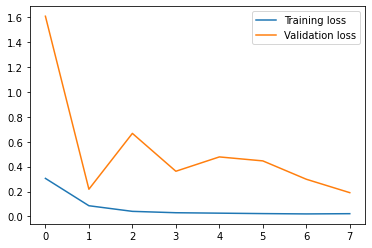

In [130]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [131]:
n_past = 241
n_days_for_prediction=240

In [132]:
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='M')-pd.offsets.MonthBegin(1)
print(predict_period_dates)

DatetimeIndex(['2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01',
               '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01',
               '2002-09-01', '2002-10-01',
               ...
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', length=240, freq=None)


In [133]:
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

In [134]:
df_for_training.shape

(424, 13)

In [135]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [136]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [137]:
forecast_dates

[datetime.date(2002, 1, 1),
 datetime.date(2002, 2, 1),
 datetime.date(2002, 3, 1),
 datetime.date(2002, 4, 1),
 datetime.date(2002, 5, 1),
 datetime.date(2002, 6, 1),
 datetime.date(2002, 7, 1),
 datetime.date(2002, 8, 1),
 datetime.date(2002, 9, 1),
 datetime.date(2002, 10, 1),
 datetime.date(2002, 11, 1),
 datetime.date(2002, 12, 1),
 datetime.date(2003, 1, 1),
 datetime.date(2003, 2, 1),
 datetime.date(2003, 3, 1),
 datetime.date(2003, 4, 1),
 datetime.date(2003, 5, 1),
 datetime.date(2003, 6, 1),
 datetime.date(2003, 7, 1),
 datetime.date(2003, 8, 1),
 datetime.date(2003, 9, 1),
 datetime.date(2003, 10, 1),
 datetime.date(2003, 11, 1),
 datetime.date(2003, 12, 1),
 datetime.date(2004, 1, 1),
 datetime.date(2004, 2, 1),
 datetime.date(2004, 3, 1),
 datetime.date(2004, 4, 1),
 datetime.date(2004, 5, 1),
 datetime.date(2004, 6, 1),
 datetime.date(2004, 7, 1),
 datetime.date(2004, 8, 1),
 datetime.date(2004, 9, 1),
 datetime.date(2004, 10, 1),
 datetime.date(2004, 11, 1),
 datetime.da

In [138]:
df_forecast = pd.DataFrame({'DATE':np.array(forecast_dates), 'PRICES':y_pred_future})
df_forecast['DATE']=pd.to_datetime(df_forecast['DATE'])

In [139]:
original = mergedRes[['DATE', 'PRICES']]
original['DATE']=pd.to_datetime(original['DATE'])
original = original.loc[original['DATE'] >= '2001-1-12']

/var/folders/89/krsw3v1d59x2vrmqhb4x8qx80000gn/T/ipykernel_1408/1928548450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['DATE']=pd.to_datetime(original['DATE'])


In [140]:
original

,DATE,PRICES
DATE,,
2001-01-12,2001-01-12,116.453
2002-01-01,2002-01-01,117.143
2002-01-02,2002-01-02,117.844
2002-01-03,2002-01-03,118.687
2002-01-04,2002-01-04,119.611
...,...,...
2021-01-12,2021-01-12,280.152
2022-01-01,2022-01-01,284.767
2022-01-02,2022-01-02,290.433


In [141]:
df_forecast

,DATE,PRICES
0,2002-01-01,121.830238
1,2002-02-01,122.737762
2,2002-03-01,123.834747
3,2002-04-01,124.515251
4,2002-05-01,124.795006
...,...,...
235,2021-08-01,225.446594
236,2021-09-01,227.194290
237,2021-10-01,226.872787
238,2021-11-01,227.629074


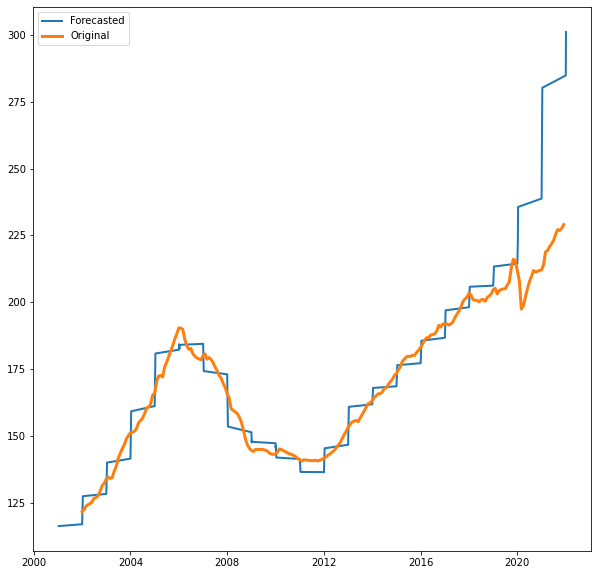

In [142]:
plt.figure(figsize=(10,10))
plt.plot(original['DATE'], original['PRICES'])
plt.plot(df_forecast['DATE'], df_forecast['PRICES'])
plt.legend(['Forecasted','Original'], prop={'size':10})
plt.show()